# Data Visualization: From Square One to Interactivity 

In [ ]:
#!pip install matplotlib seaborn numpy pandas bokeh --upgrade

### Matt Brems
- M.S. in Statistics from [Ohio State](https://stat.osu.edu/), B.A. from [Franklin College](https://franklincollege.edu/).
- Global Lead Data Science Instructor with [General Assembly](https://generalassemb.ly/education/data-science-immersive).
- [LinkedIn](https://www.linkedin.com/in/matthewbrems/)
- [Twitter](https://twitter.com/matthewbrems/)
- [GitHub](https://github.com/matthewbrems/)

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
```
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
```
</details>

---

<details><summary>We often generate data visualizations for **exploratory analysis** or **explanatory analysis**. What is the difference?</summary>
```
- Exploratory analysis is when we are exploring our data, like identifying patterns or discovering outliers.
- Explanatory analysis is when we are communicating (explaining) our results to a client, boss, stakeholder, etc.
```
</details>

Today, we will focus on **explanatory analysis**. Many of these tools will be transferable to exploratory analysis.

## Agenda
1. Square One: Picking a good visualization.
2. Intermediate: Improving the basic visualizations.
3. Interactivity: Adding interactivity to visualizations.

Along the way, we'll be implementing each step together and cover best practices!

### Packages Today
- [NumPy](http://www.numpy.org/): Numerical Python - scalars, vectors, matrices, etc. and tools for manipulating them.
- [Pandas](https://pandas.pydata.org/): Python Data Analysis Library - storing/"munging" (cleaning/transforming) data.
- [Matplotlib](https://matplotlib.org/): Python plotting library - this is (unsurprisingly) what we'll use to plot things!
- [Bokeh](https://bokeh.pydata.org/en/latest/): Interactive Visualization Library - this is (also unsurprisingly) what we'll use to generate interactive visualizations!
- [Seaborn](https://seaborn.pydata.org/): Statistical Visualization Library - this is commonly used for more complicated visuals (we'll ignore most of these because they're less accessible to stakeholders).

In [1]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Importing specific Bokeh 
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# This magic line will allow you to generate plots
# within the Jupyter note book.
%matplotlib inline

In [2]:
# Read in stock data, then convert date to datetime format.

stocks = pd.read_csv('./data/stocks_data.csv')
stocks['date'] = pd.to_datetime(stocks['date'])

In [3]:
# Check out the first five rows of the stocks data.

stocks.head()

,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


In [4]:
stocks['weekday'].value_counts()

Wednesday    5755
Tuesday      5715
Thursday     5642
Friday       5600
Monday       5243
Name: weekday, dtype: int64

In [5]:
stocks['ticker'].value_counts()

SBUX    3926
AAPL    3926
YHOO    3926
DOW     3926
NKE     3926
INTC    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

# Square One: Picking a good visualization.

There are many ways to visualize the same data. [This FlowingData post](https://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/) by Nathan Lau shows the same data visualized 25 different ways. Three of the 25 examples are shown below.

![](./images/country-v-average.png)

![](./images/country-over-time.png)

![](./images/country-by-time.png)

- If we Google "data visualization tools," we will quickly get overwhelmed with all of the data visualization libraries that are out there. (Tableau, R/Python, Images in Google Sheets, D3.js, Microsoft Paint...)
- If we Google "good data visualizations," we'll see lots of amazing images/videos/dashboards/apps with really high production values, but we recognize that we won't be able to easily replicate these.
- If we head to [viz.wtf](http://viz.wtf), we can see lots of images that show us what **not** to do... but not what **to** do!

### If-This-Then-That Rules

I'm not a visual designer. I don't have a natural eye for things that may work well together. Instead, I like things that are rule-oriented. I want to attempt to break "picking a good visualization" down into a set of "if-this-then-that" rules. 
- This won't be a perfect, "one-size-fits-all" set of rules. 
- There will be situations in which you want to "break" these rules. If you have the time, the energy, and/or the creativity... then break them!
- Hopefully this is a "one-size-fits-most" set of rules.

### Qualitative vs. Quantitative Variables
- Quantitative variables (commonly called numerical variables) are variables that are measured on a numeric scale.
    - Examples: stock price at closing bell, volume of stocks traded.
- Qualitative variables (commonly called categorical variables) are variables that are not measured on a numeric scale.
    - Examples: Days of the week, stock ticker.

### If you are reporting one or two numbers, then:
- simply state the numbers, or
- compare numbers using a bar chart.

**Example 1**: Suppose we wanted to quantify the performance of the AAPL stock over time.

In [6]:
# AAPL Stock Price on January 2, 1998. 
print(stocks[(stocks['date'] == min(stocks['date'])) & (stocks['ticker'] == 'AAPL')]['close'])

# AAPL Stock Price on August 9, 2013.
print(stocks[(stocks['date'] == max(stocks['date'])) & (stocks['ticker'] == 'AAPL')]['close'])

0    3.95098
Name: close, dtype: float64
3925    454.37
Name: close, dtype: float64


In [7]:
# Percent change formula: 100 * (value_2 - value_1) / |value_1|

pct_change = 100 * (454.37 - 3.95) / 3.95

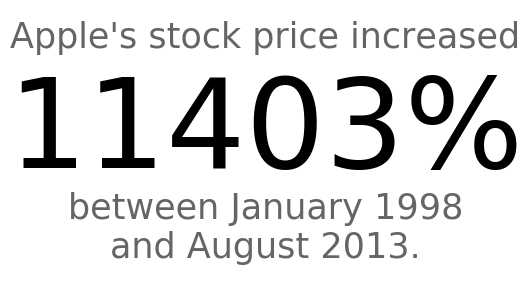

In [8]:
# Set size of figure: eight horizontal inches by five vertical inches.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Apple\'s stock price increased', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'between January 1998\nand August 2013.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off')

# Show plot!
plt.show()

It is often a bad idea to simply report one number. By giving only one number, we can often be misleading. Let's avoid this!
- I got a 74% on my last exam.
    - I got a 74% on my last exam. The class average was a 56%.
- There were 62,984,828 votes cast for Trump in the 2016 Presidential election.
    - There were 65,853,514 votes cast for Clinton and 62,984,828 votes cast for Trump in the 2016 Presidential election.
- Our company earned 5MM (five million) dollars last year.
    - Our company earned 5MM last year. This is our highest yet; our company had an average of 2MM in revenue over all previous years.


- ***My "best practice" recommendation***: Rather than reporting one number, provide context by comparing multiple numbers.

---

**Example 2**: Suppose we wanted to compare AAPL performance to Dow growth.

In [9]:
# DOW Stock Price on January 2, 2008.
print(stocks[(stocks['date'] == min(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close'])

# DOW Stock Price on August 9, 2013.
print(stocks[(stocks['date'] == max(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close'])

3926    19.0287
Name: close, dtype: float64
7851    38.08
Name: close, dtype: float64


In [10]:
aapl_pct_change = 100 * (454.37 - 3.95) / 3.95
dow_pct_change = 100 * (38.08 - 19.0287) / 19.0287

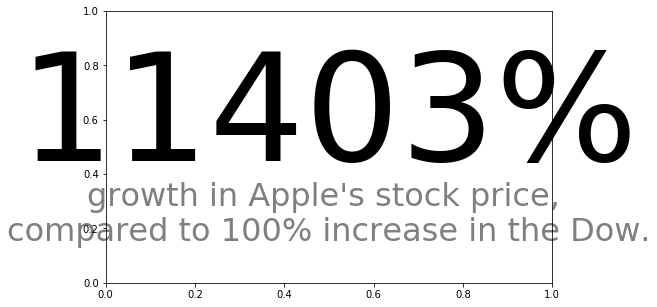

In [12]:
# Set size of figure: eight horizontal inches by five vertical inches.
plt.figure(figsize=(8, 5))

# Create text:
# at (horizontal = 0.5, vertical = 0.6)
# stating the percent change (s means string)
# center-aligned
# font size 150
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.6,
         s = str(round(aapl_pct_change)) + '%',
         ha = 'center',
         va = 'center',
         size = 150,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "growth in Apple's stock price, compared to 100% increase in the Dow."
# with a line break in between "price" and "compared"
# center-aligned
# font size 32
# alpha = 0.5 --> 50% clear; 50% opaque
plt.text(x = 0.5,
         y = 0.25,
         s = 'growth in Apple\'s stock price, \ncompared to ' + str(round(dow_pct_change)) + '% increase in the Dow.',
         ha = 'center',
         va = 'center',
         size = 32,
         alpha = 0.5)

# No axes.
#plt.axis('off')

# Show plot!
plt.show()

Identifying the right combination of `figsize`, `x`, `y`, `size`, line breaks (`\n`) in `s`, and so on will mostly be done through guess-and-check. 
- ***My "best practice" recommendation***: copy what exists now to your next use, then tweak as needed!

**Practice 3**: Report that `GOOG` (Google) grew from 100.76 in August 2004 to 890.31 in August 2013. (I've given you the `goog_pct_change` below.) Be sure to compare it to another number!

In [13]:
goog_pct_change = 100 * (890.31 - 100.76) / (100.76)

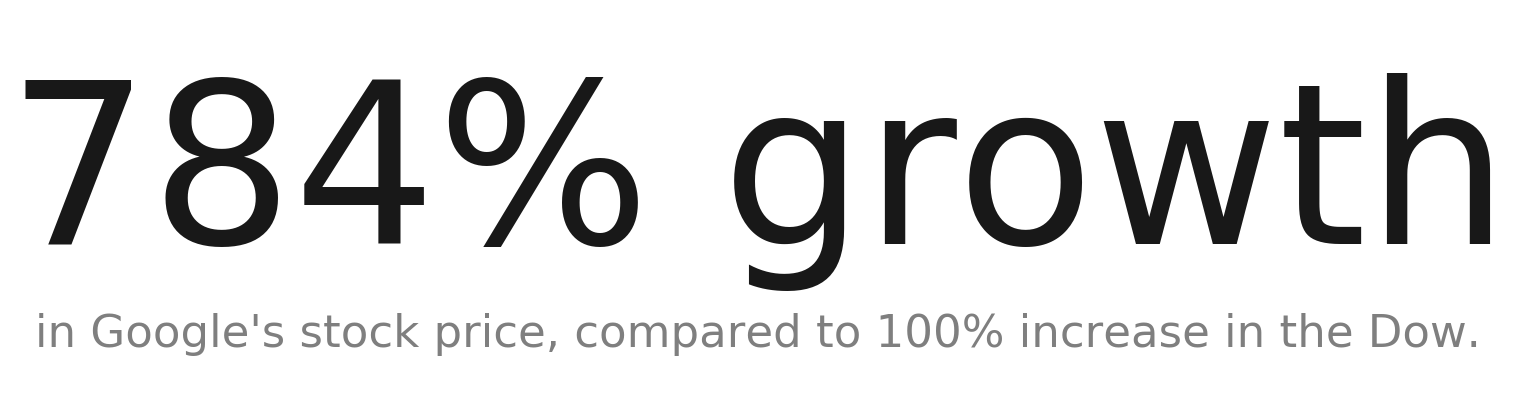

In [14]:
# Set size of figure: ten horizontal inches by seven vertical inches.
plt.figure(figsize=(10, 7))

# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(goog_pct_change)) + '% growth',
         ha = 'center',
         va = 'center',
         size = 225,
         alpha = 0.9)

# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5
plt.text(x = 0.5,
         y = 0.15,
         s = 'in Google\'s stock price, compared to ' + str(round(dow_pct_change)) + '% increase in the Dow.',
         ha = 'center',
         va = 'center',
         size = 45,
         alpha = 0.5)

# No axes.
plt.axis('off')

# Show plot!
plt.show()

> You might say, **"Matt! This isn't data visualization!!"**

I disagree, because we're communicating data in a way that probably gets our point across.
- It's not lost in a table.
- It's very clearly calling out what we want to emphasize.
- As Einstein said, "Everything should be as simple as it can be, but not simpler." This is pretty simple. If it works... use it!
- Understanding `x`, `y`, `fontsize`, etc. will be helpful later if we want to annotate a plot with text.

![](./images/wordart.png)

But I also understand that we could have done the above with Microsoft WordArt... so let's do something a bit more sophisticated.

---

**Example 4**: Suppose we wanted to compare AAPL performance to Dow growth using a bar chart.

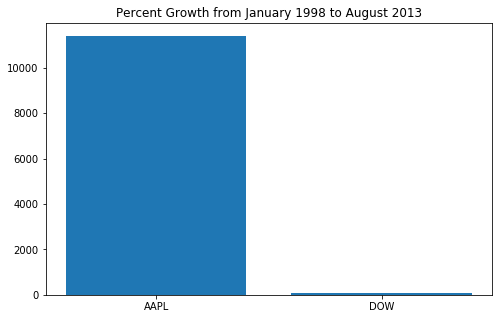

In [15]:
# Set size of figure: eight horizontal inches by five vertical inches.
plt.figure(figsize=(8, 5))

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
aapl, dow = plt.bar(['AAPL', 'DOW'], # We have to specify our X labels/location.
                    [aapl_pct_change, dow_pct_change]) # We have to specify the Y height.

# Note that we create two objects here: aapl and dow.

# Add a title and show the plot.
plt.title('Percent Growth from January 1998 to August 2013')
plt.show();

**If you are reporting one or two numbers**, then:
- simply state the numbers, or
- compare numbers using a bar chart.

What you choose to do depends on the time and energy you have.

Remember that it is usually a bad idea to just report one number!

---

#### Commonly, we want to visualize *distributions*.
- The **distribution** of a variable is 1) the set of all values of that variable and 2) how frequently we observe each value.

![](./images/iq.jpeg)

- This is a visual representation of all of our data. We can then use this to answer lots of other questions.
    - What is the likeliest IQ for someone to have?
    - What is the range of IQs?
    - How likely is it that someone has an IQ above 110? Between 85 and 105?

### If your goal is to visualize the distribution of one variable, then:
- if that variable is qualitative: **use a bar chart**.
- if that variable is quantitative: **use a histogram**.

**Example 5**: Suppose we wanted to visualize the distribution of stock values. (That is, how many values did we observe for each stock?)

In [16]:
stocks['ticker'].value_counts()

SBUX    3926
AAPL    3926
YHOO    3926
DOW     3926
NKE     3926
INTC    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

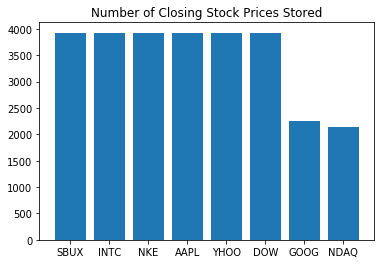

In [17]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
sbux, intc, nke, aapl, yhoo, dow, goog, ndaq = plt.bar(['SBUX', 'INTC', 'NKE', 'AAPL', 'YHOO', 'DOW', 'GOOG', 'NDAQ'],
                                                       stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored')
plt.show();

**Example 6**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. What's the problem here?

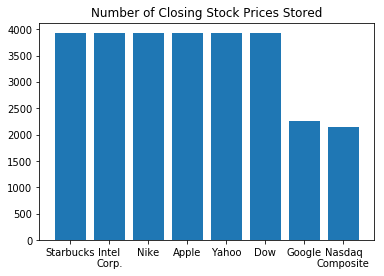

In [19]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
sbux, intc, nke, aapl, yhoo, dow, goog, ndaq = plt.bar(['Starbucks', 'Intel\nCorp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq\nComposite'],
                                                       stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored')
plt.show();

**Example 7**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. We can get around the above issue by creating a **horizontal bar chart**.

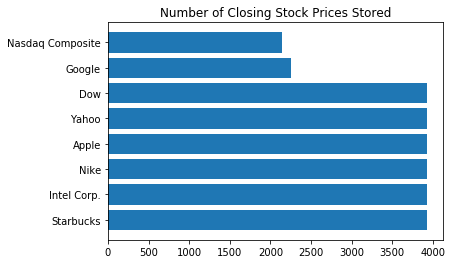

In [21]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)
# We have to pass in our values and labels again. Luckily, we don't need to swap the order!

plt.barh(['Starbucks', 'Intel Corp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq Composite'],
         stocks['ticker'].value_counts())

plt.title('Number of Closing Stock Prices Stored')
plt.show();

In [22]:
stocks['ticker'].value_counts()

SBUX    3926
AAPL    3926
YHOO    3926
DOW     3926
NKE     3926
INTC    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

**Example 8**: Suppose we wanted to visualize the distribution of closing stock prices for `SBUX`.

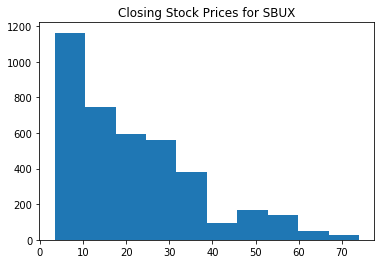

In [23]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'])
plt.title('Closing Stock Prices for SBUX')
plt.show();

In [24]:
stocks[stocks['ticker'] == 'SBUX']['close'].describe()

count    3926.000000
mean       21.644001
std        14.793992
min         3.444280
25%         9.671480
50%        17.994200
75%        29.533600
max        73.989300
Name: close, dtype: float64

- Note that histograms are easier to produce. When dealing with qualitative variables, we need to tell our bar chart what the X values are. When dealing with quantitative variables, the histogram can infer what it is!
- However, also note that histograms can vary wildly based on how many bins ("categories") there are.

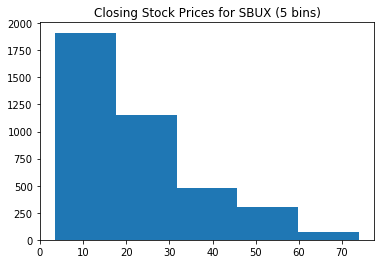

In [25]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=5)
plt.title('Closing Stock Prices for SBUX (5 bins)')
plt.show();

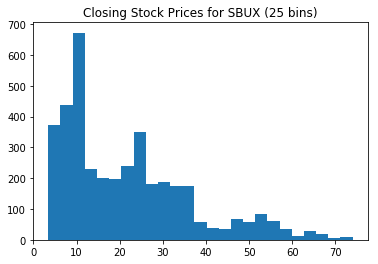

In [26]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=25)
plt.title('Closing Stock Prices for SBUX (25 bins)')
plt.show();

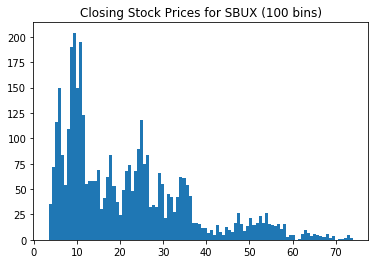

In [27]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100)
plt.title('Closing Stock Prices for SBUX (100 bins)')
plt.show();

There is no best number of bins and any guidelines about number of bins will usually depend on the shape of the data. 
- ***My "best practice" recommendation***: Add a kernel density estimate (`kde`) that will attempt to estimate what the true probability density function (pdf) will look like. This can be done (easily) in `seaborn`, a Python visualization library built on top of `matplotlib`.

In [28]:
import seaborn as sns

/Users/mattbrems/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


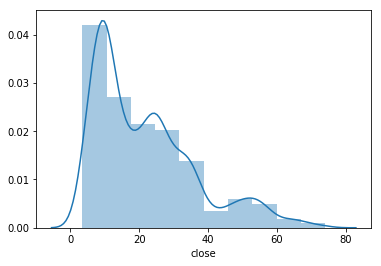

In [29]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=10, kde = True);

/Users/mattbrems/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


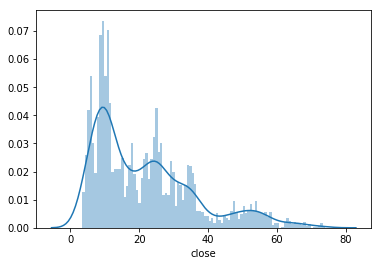

In [30]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100, kde = True);

Note that a kernel density estimate might be confusing to some stakeholders (clients, boss, etc.). Consider using `kde = True` only for exploratory visualization.
    
---

**Practice 9**: Visualize the distribution of `GOOG` closing prices. Try it with at least two different sets of bins and at least generate one with a kernel density estimate!

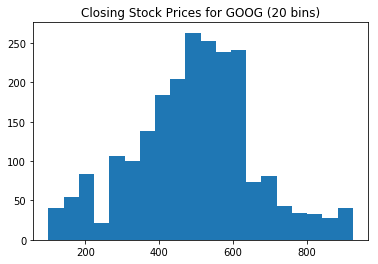

In [32]:
plt.hist(stocks[stocks['ticker'] == 'GOOG']['close'], bins=20)
plt.title('Closing Stock Prices for GOOG (20 bins)')
plt.show();

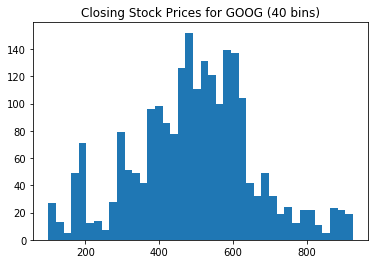

In [33]:
plt.hist(stocks[stocks['ticker'] == 'GOOG']['close'], bins=40)
plt.title('Closing Stock Prices for GOOG (40 bins)')
plt.show();

/Users/mattbrems/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


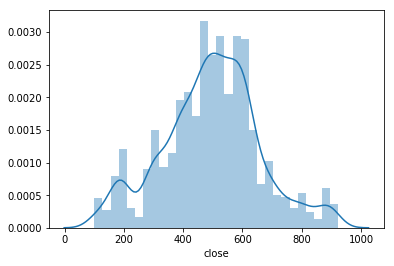

In [34]:
sns.distplot(stocks[stocks['ticker'] == 'GOOG']['close'], bins=30, kde = True);

**If your goal is to visualize the distribution of one variable**, then:
- if that variable is qualitative: use a bar chart.
- if that variable is quantitative: use a histogram.

Remember that if you are visualizing with a histogram, then your number of bins might substantially affect how your distribution looks, especially for small sample sizes. Consider using a kernel density estimate to help you visualize a smooth distribution of your data during your **exploratory** phase, but you *may* want to exclude the kde for your **explanatory** (reporting) phase.

---

#### Commonly, we want to visualize *relationships*.
- The **relationship** between two variables allows us to understand if and how one variable changes when another changes.

![](./images/scatter.jpeg)

- This is a visual representation of all of our data. We can use this to answer lots of other questions.
    - Does there appear to be any association between ice cream and murders?
    - As ice cream consumption increases, how does the number of murders change?
    - **Note**: We cannot say anything about causality here!

### If your goal is to visualize the relationship between two variables, then:
- if you are comparing two qualitative variables, **use a table or a heatmap**.
    - Note: When comparing two qualitative variables, we're usually looking at counts, averages, or some other summary by each of the two categorical variables... so in many cases it's _technically_ three variables.
- if you are comparing time and another quantitative variable, **use a lineplot**.
- if you are comparing two (non-time) quantitative variables, **use a scatterplot**.
- if you are comparing a qualitative variable and a quantitative variable, **use stacked histograms**.

**Example 10**: Suppose we wanted to examine how stock volume changes over days of week and by stock ticker.

In [35]:
# Generate a PivotTable examining the average volume.

df = pd.pivot_table(stocks,
               values = 'volume',    # the variable we want to measure
               index = 'ticker',    # the rows of our PivotTable - here, it's the stock tickers
               columns = 'weekday', # the columns of our PivotTable - here, it's the days of the week
               aggfunc = np.mean)   # the function we use to aggregate - here, it's numpy.mean()

In [48]:
# Let's check out the PivotTable.

df = df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

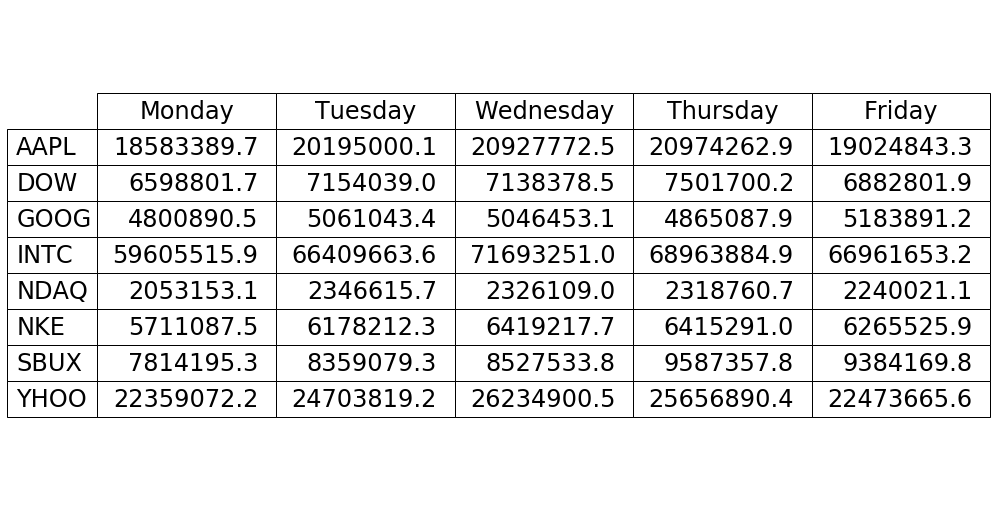

In [49]:
plt.figure(figsize=(16,9))
table = plt.table(cellText=np.array(round(df,1)),
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center')

table.set_fontsize(24)
table.scale(1,3)
plt.axis('off')
plt.show();

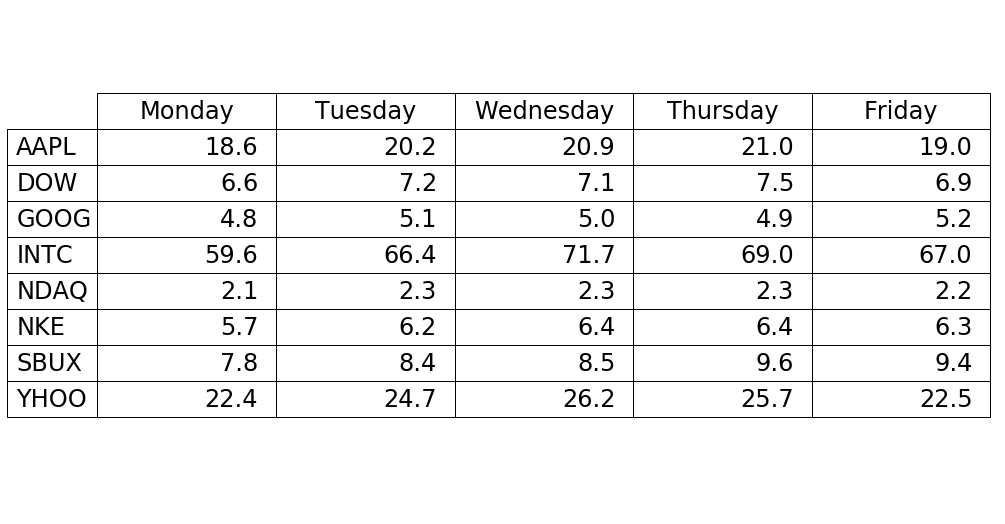

In [50]:
plt.figure(figsize=(16,9))
table = plt.table(cellText=np.array(round(df/1000000,1)),
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center')

table.set_fontsize(24)
table.scale(1,3)
plt.axis('off')
plt.show();

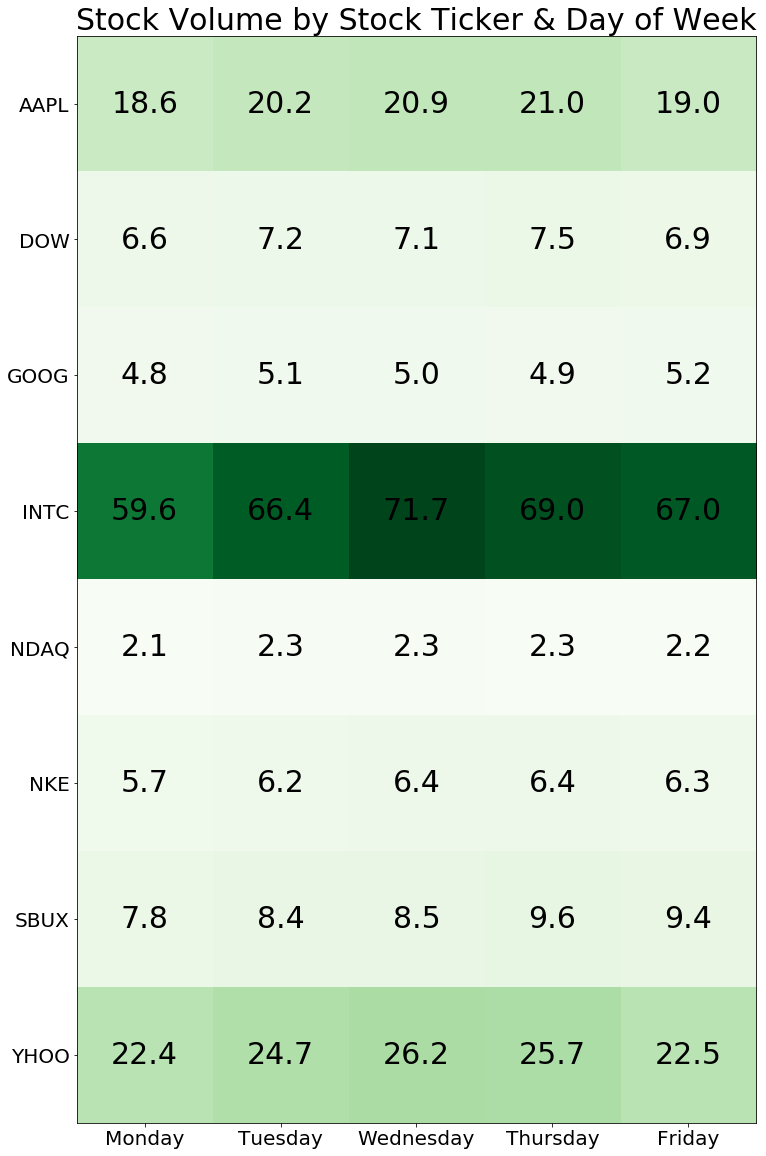

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))

# Create heatmap.
table = ax.imshow(X=np.array(round(df,1)/1000000),
                   cmap = 'Greens')

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))

ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Stock Volume by Stock Ticker & Day of Week", fontsize = 30)

for i in range(len(df.columns)):
    for j in range(len(df.index)):
        text = ax.text(i,
                       j,
                       round(df.loc[df.index[j], df.columns[i]]/1000000,1),
                       ha="center",
                       va="center",
                       color='k',
                       fontsize = 30)
        
plt.show();

**Example 11**: Suppose we wanted to examine how stock volume changes over time for GOOG.

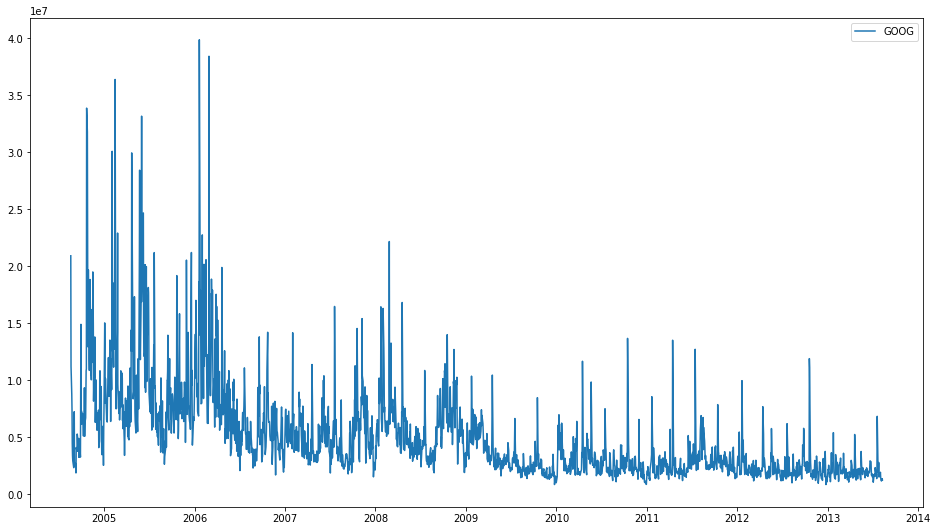

In [58]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of GOOG volume over time.
plt.plot(stocks[stocks['ticker'] == 'GOOG']['date'],
         stocks[stocks['ticker'] == 'GOOG']['volume'],
         label = 'GOOG')

plt.legend(loc = 'upper right')

# Show our plot!
plt.show();

**Example 12**: Suppose we wanted to examine how stock volume changes over time for GOOG *and* for NKE.

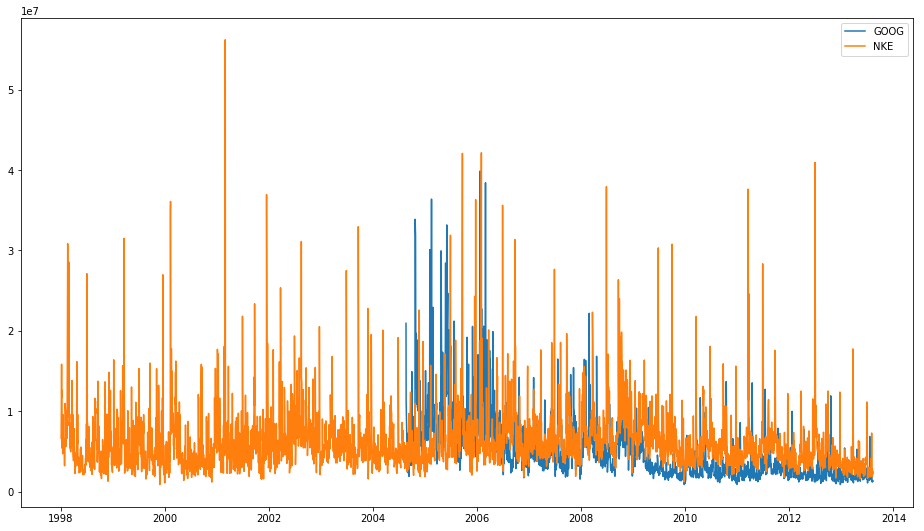

In [59]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of GOOG volume over time.
plt.plot(stocks[stocks['ticker'] == 'GOOG']['date'],
         stocks[stocks['ticker'] == 'GOOG']['volume'],
         label = 'GOOG')

# Create line plot of NKE volume over time.
plt.plot(stocks[stocks['ticker'] == 'NKE']['date'],
         stocks[stocks['ticker'] == 'NKE']['volume'],
         label = 'NKE')

plt.legend(loc = 'upper right')

# Show our plot!
plt.show();

**Example 13**: Suppose we wanted to examine how the stock volume changed from the first day of trading in 2012 to the first day of trading in 2013 for all stock tickers.
- A **slopegraph** is what Cole Nussbaumer Knaflic refers to as a line graph with two points on the x-axis.

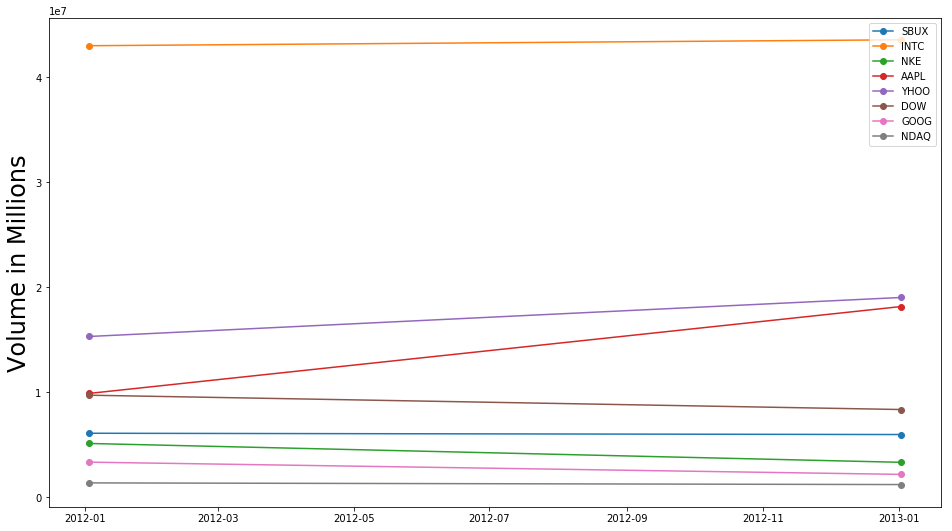

In [67]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of all stock volumes over 2012.
for i in ['SBUX', 'INTC', 'NKE', 'AAPL', 'YHOO', 'DOW', 'GOOG', 'NDAQ']:
    plt.plot(stocks[(stocks['ticker'] == i) & ((stocks['date'] == '2012-01-03') | (stocks['date'] == '2013-01-02'))]['date'],
         stocks[(stocks['ticker'] == i) & ((stocks['date'] == '2012-01-03') | (stocks['date'] == '2013-01-02'))]['volume'],
         label = i, marker = 'o')
    
plt.legend(loc = 'upper right')
plt.ylabel("Volume in Millions", fontsize = 24)

# Show our plot!
plt.show();

**Example 14**: Suppose we wanted to visualize how strongly correlated high daily prices and daily trading volumes are.

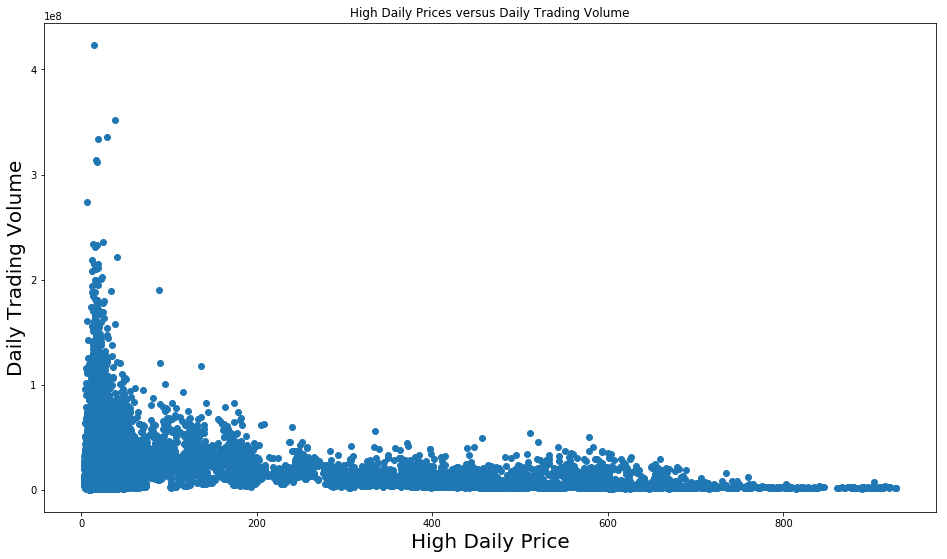

In [69]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(stocks['high'],
            stocks['volume']);

plt.title("High Daily Prices versus Daily Trading Volume")
plt.ylabel("Daily Trading Volume", fontsize = 20)
plt.xlabel("High Daily Price", fontsize = 20)

# Show our plot!
plt.show();

**Example 15**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL`.

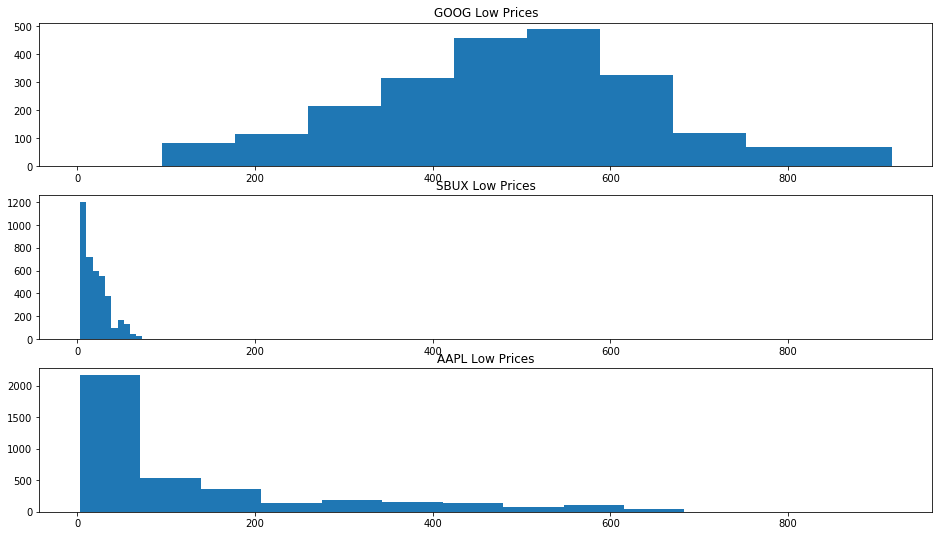

In [71]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(311)
ax1.set_title('GOOG Low Prices')
ax1.hist(stocks[stocks['ticker'] == 'GOOG']['low']);

# plt.subplot(312) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_title('SBUX Low Prices')
ax2.hist(stocks[stocks['ticker'] == 'SBUX']['low']);

# plt.subplot(313) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(313, sharex=ax2)
ax3.set_title('AAPL Low Prices')
ax3.hist(stocks[stocks['ticker'] == 'AAPL']['low']);

plt.show();

**Example 16**: Suppose you want to visualize the distribution of low prices for `GOOG`, `SBUX`, and `AAPL` but want to explicitly show the differences in means between the groups.

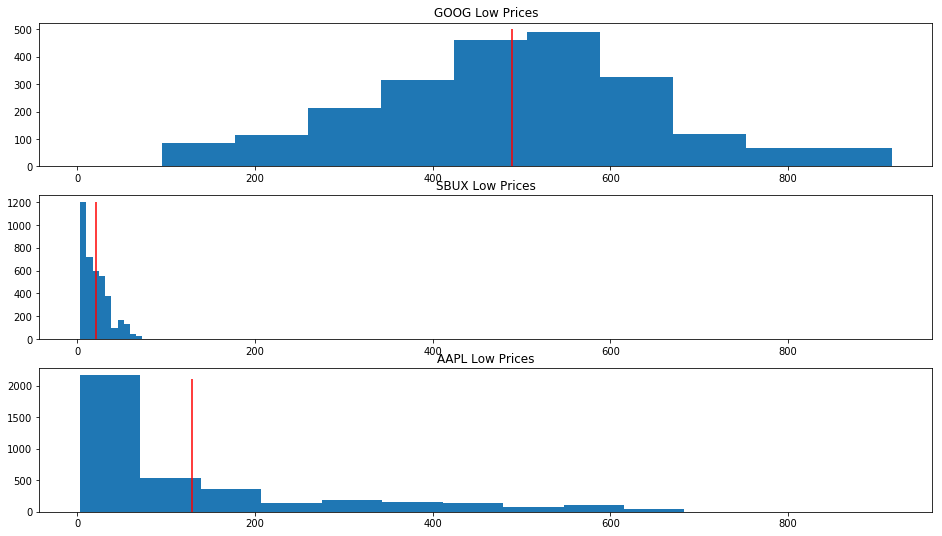

In [72]:
# Establish figure size.
plt.figure(figsize = (16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(311)
ax1.set_title('GOOG Low Prices')
ax1.hist(stocks[stocks['ticker'] == 'GOOG']['low'])
ax1.vlines(x = np.mean(stocks[stocks['ticker'] == 'GOOG']['low']), ymin = 0, ymax = 500, color = 'r');

# plt.subplot(312) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_title('SBUX Low Prices')
ax2.hist(stocks[stocks['ticker'] == 'SBUX']['low'])
ax2.vlines(x = np.mean(stocks[stocks['ticker'] == 'SBUX']['low']), ymin = 0, ymax = 1200, color = 'r');

# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(313, sharex=ax2)
ax3.set_title('AAPL Low Prices')
ax3.hist(stocks[stocks['ticker'] == 'AAPL']['low'])
ax3.vlines(x = np.mean(stocks[stocks['ticker'] == 'AAPL']['low']), ymin = 0, ymax = 2100, color = 'r');

plt.show();

Some people will use stacked bar charts to visualize the distribution of variables broken out into categories. I generally prefer to not do this.
- ***My "best practice" recommendation***: Stay away from stacked bar charts; there are usually better ways to communicate what you want to communicate.

![](./images/stacked-bar-chart.png)

### If-This-Then-That Rules
- If I am stating one or two numbers, then:
    - **simply report the numbers**.
    - compare numbers using a **bar chart**.
- If I am visualizing the distribution of one variable, then:
    - If that variable is qualitative: **use a bar chart**.
    - If that variable is quantitative: **use a histogram**.
- If I am visualizing the relationship between two variables, then:
    - If both variables are qualitative, then: 
        - If there are at most three categories for both variable, then **use a table**.
        - If there are more than three categories in either variable, then **use a heatmap**.
    - If both variables are quantitative, then:
        - If one variable is time, then **use a line plot**.
        - Otherwise, **use a scatterplot**.
    - If one variable is quantitative and another is qualitative then:
        - **Use a bunch of histograms**.
        - Stacked bar charts, if you choose to do so.

# Intermediate: Improving the basic visualization.

If you're familiar with before/after images, they're a convenient way for us to see how drastically things have changed.

![](./images/beforeafter.jpg)

What we've done so far is to create the "before" image. We've identified a ***good*** tool for the job. Now let's make it a ***great*** tool.

Before getting into a specific list of things to consider, let's critique an example of a visual.

**Example 17**: Suppose we wanted to visualize two stock prices over time. It would be helpful to be able to compare these stock prices to one another as well.

<details><summary>What type of chart would we likely want to create?</summary>
```
- If we are visualizing the relationship between two variables:
    - If both variables are quantitative:
        - If one quantitative variable is time:
            - If we are visualizing over more than two time points:
                - Let's do a line graph!
```
</details>

In [73]:
import matplotlib.dates as dates
import datetime

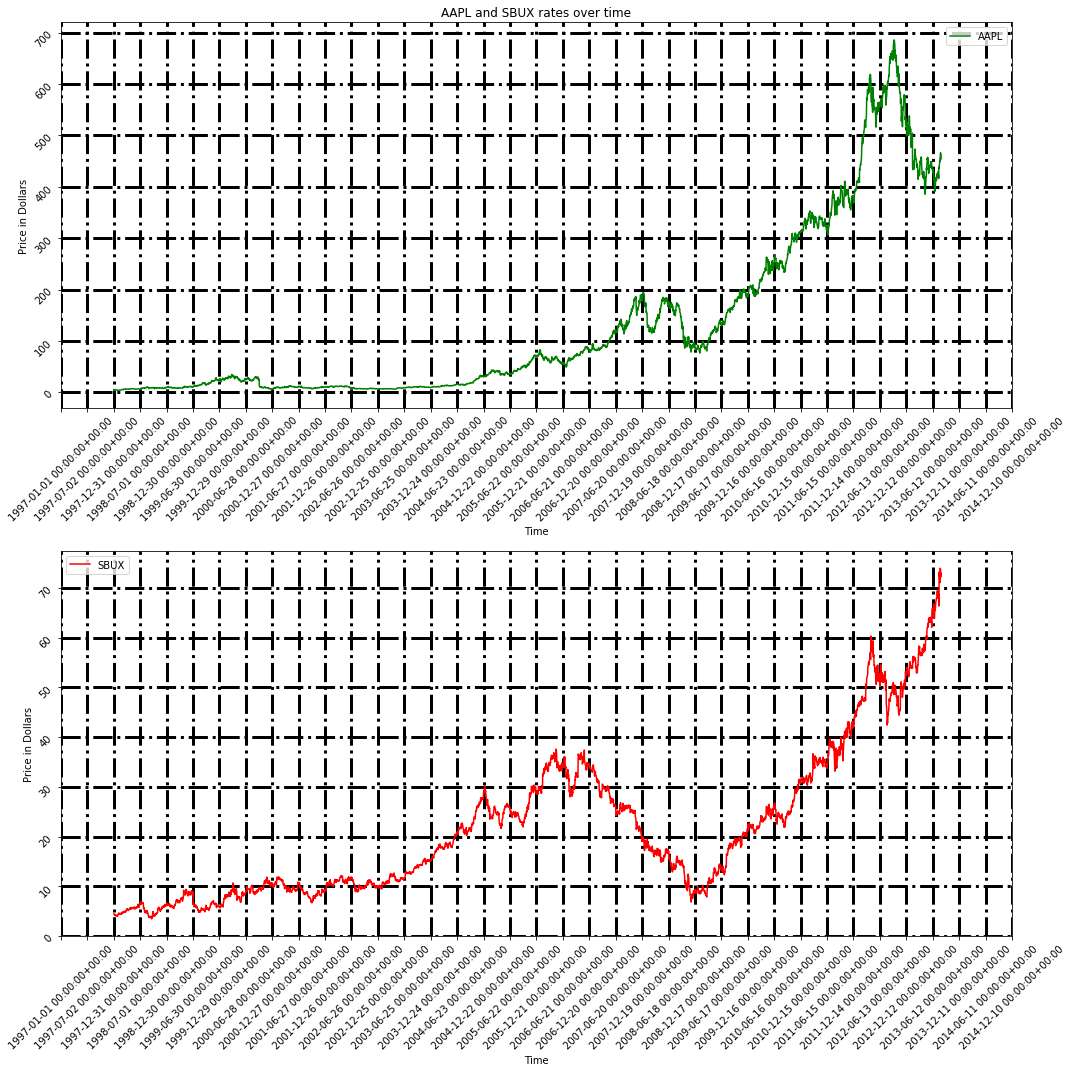

In [74]:
# Establish the size of the figure.
plt.figure(figsize=(15, 15))

# Create two plots. (2 rows, 1 column, referring to 1st plot)
plt.subplot(2, 1, 1)

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'green',
         label = 'AAPL')

# Create the legend and set it in the upper-right hand corner.
plt.legend(loc = 'upper right')

# Create a grid in the background.
plt.grid(True, linewidth=3, linestyle = '-.', c='black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

plt.ylabel("Price in Dollars")
plt.xlabel("Time")
plt.title("AAPL and SBUX rates over time")

# Create two plots. (2 rows, 1 column, referring to 2nd plot)
plt.subplot(2, 1, 2)

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'red',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left')

# Create a grid in the background.
plt.grid(True, linewidth=3, linestyle = '-.', c='black')

# Create tick mark labels on the X axis and rotate them.
plt.xticks(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26)),
           dates.num2date(dates.drange(dstart=datetime.datetime(1997, 1, 1),
                        dend=datetime.datetime(2014, 12, 31),
                        delta=datetime.timedelta(weeks=26))), rotation = 45)

# Create tick mark labels on the Y axis and rotate them.
plt.yticks(rotation = 45)

# Create X axis label.
plt.xlabel("Time")

# Create Y axis label.
plt.ylabel("Price in Dollars")

# Great line when working with multiple subplots; makes sure they're fitted well.
plt.tight_layout()

# Show our plot!
plt.show();

<details><summary>Let's critique this. What do you like about these plots? What do you dislike?</summary>
```
- The y-axes are different, so it's hard to directly compare the two together. This could be done more efficiently in one plot.
- Red and green together is a bad idea due to colorblindness (a pretty prevalent condition). Let's pick better colors! Blue and orange are good choices for two contrasting colors.
- The grid is really "loud" and pulls attention from the series we want to study. Can we make it subtler in color and pattern or get rid of it completely?
- The x-axis has way too much information. At minimum, we can get rid of the 00:00:00+00:00 because this isn't providing any additional information. However, we can probably get rid of the days/months and make the tick marks less frequent. (We know how years are ordered, so we could just have 1998, 2003, 2008, and 2013 if we wanted!)
- Rotating the tick labels makes it tough for us to read the labels. Let's un-rotate them.
- We probably don't need the x-axis label. If we see the values 1998, 2003, 2008, and 2013, we can reasonably assume that this means years or time. Since the label isn't giving us any additional information, let's get rid of it!
- The title is hard to view. Let's make it larger.
- We can increase the size of our legend.
- This is a non-exhaustive list!
```
</details>

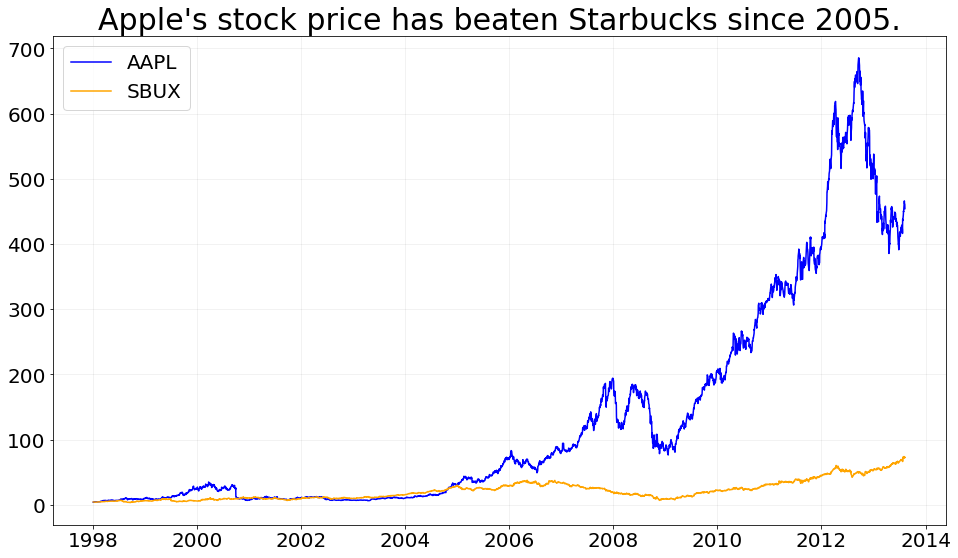

In [75]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks since 2005.", fontsize = 30)

# Show our plot!
plt.show();

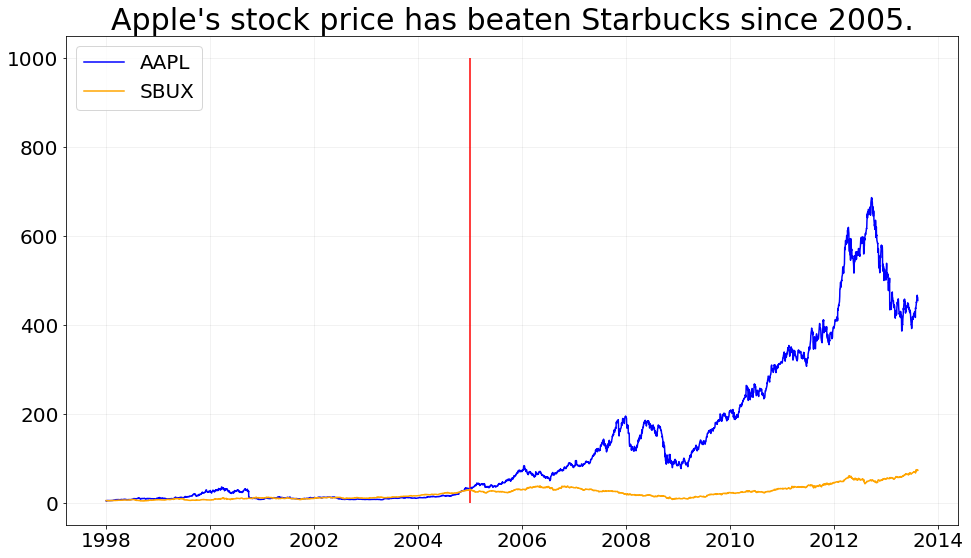

In [76]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create line plot of AAPL closing price over time.
plt.plot(stocks[stocks['ticker'] == 'AAPL']['date'],
         stocks[stocks['ticker'] == 'AAPL']['close'],
         c = 'blue',
         label = 'AAPL')

# Create line plot of SBUX closing price over time.
plt.plot(stocks[stocks['ticker'] == 'SBUX']['date'],
         stocks[stocks['ticker'] == 'SBUX']['close'],
         c = 'orange',
         label = 'SBUX')

# Create the legend and set it in the upper-left hand corner.
plt.legend(loc = 'upper left', fontsize = 20)

# Create a grid in the background.
plt.grid(True, linewidth=0.5, linestyle = '-', c='black', alpha = 0.1)

# Create tick mark labels on the Y axis and rotate them.
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create title.
plt.title("Apple's stock price has beaten Starbucks since 2005.", fontsize = 30)

# Add vertical line (vlines) to specifically identify the point of interest.
plt.vlines(x=datetime.datetime(2005, 1, 1), ymin=0, ymax=1000, color='r')

# Show our plot!
plt.show();

## When de-cluttering, here is an incomplete list of things to consider doing:
### Chart Types
##### Take away pie charts. (Use a bar chart instead!)
    
![](./images/pie_chart.png)
    
##### Take away 3D charts (especially pie charts)!
    
![](./images/3d_pie_chart.jpg)
![](./images/3d_column_chart.jpg)

##### Take away secondary y-axes.
    
![](./images/secondary_y_axis.png)

### Use color effectively.
    - Avoid red/green.
    - Use a gradient.
    
![](./images/color-bar-chart.png)

    - Remove background color.
    - Color should emphasize.
    - There are ways to emphasize other than color! (Size, a label, proximity, etc.) If you are concerned that your image is too "cluttered," then consider toning down your use of color.
    
### Axes
    - Don't rotate labels.
    - Consider rotating your chart if your axis labels are too large.
    - Move borders to light grey.
    - Remove grid.
    
### Other
    - Place legend properly (if needed).
    - If lots of small categories/extreme values, consider collapsing/truncating them.
    - Order categories in sensical order. If a logical/sensical order does not exist, then from largest value to smallest value.

---
## Crafting the experience:
    - Use smart chart title.    
    - Consider the "Z".
    - Align along vertical axis.

<img src="./images/investment_1.png" width="500">

<img src="./images/investment_2.png" width="500">

    - Use bold to emphasize text.
        - But don't bold everything.
    - If there is a lot going on, then walk people through it slowly.

# Interactivity: Adding interactivity to visualizations.

In [77]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: /Users/mattbrems/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloadi

In [78]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL

dates = np.array(AAPL['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, close=AAPL['adj_close']))

p = figure(plot_height=300, plot_width=800, tools="", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1500], dates[2500]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Price'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_rool = RangeTool(x_range=p.x_range)
range_rool.overlay.fill_color = "navy"
range_rool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool

output_notebook()

show(column(p, select))

# output_file("stock_slider.html")

Loading BokehJS ...

<details><summary>What is a situation in which this visual would work well?</summary>
```
- When you're measuring something over a long period of time and want to be able to view the whole thing and also more granularly see individual shifts.
```
</details>

In [81]:
p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

aapl = np.array(stocks[stocks['ticker'] == 'AAPL']['close'])
aapl_dates = np.array(stocks[stocks['ticker'] == 'AAPL']['date'], dtype=np.datetime64)

dow = np.array(stocks[stocks['ticker'] == 'DOW']['close'])
dow_dates = np.array(stocks[stocks['ticker'] == 'DOW']['date'], dtype=np.datetime64)

goog = np.array(stocks[stocks['ticker'] == 'GOOG']['close'])
goog_dates = np.array(stocks[stocks['ticker'] == 'GOOG']['date'], dtype=np.datetime64)

intc = np.array(stocks[stocks['ticker'] == 'INTC']['close'])
intc_dates = np.array(stocks[stocks['ticker'] == 'INTC']['date'], dtype=np.datetime64)

ndaq = np.array(stocks[stocks['ticker'] == 'NDAQ']['close'])
ndaq_dates = np.array(stocks[stocks['ticker'] == 'NDAQ']['date'], dtype=np.datetime64)

nke = np.array(stocks[stocks['ticker'] == 'NKE']['close'])
nke_dates = np.array(stocks[stocks['ticker'] == 'NKE']['date'], dtype=np.datetime64)

sbux = np.array(stocks[stocks['ticker'] == 'SBUX']['close'])
sbux_dates = np.array(stocks[stocks['ticker'] == 'SBUX']['date'], dtype=np.datetime64)

yhoo = np.array(stocks[stocks['ticker'] == 'YHOO']['close'])
yhoo_dates = np.array(stocks[stocks['ticker'] == 'YHOO']['date'], dtype=np.datetime64)

p1.line(stocks[stocks['ticker'] == 'AAPL']['date'], stocks[stocks['ticker'] == 'AAPL']['close'], color='#0000FF', legend='AAPL')
p1.line(stocks[stocks['ticker'] == 'SBUX']['date'], stocks[stocks['ticker'] == 'SBUX']['close'], color='#FF0000', legend='SBUX')
p1.line(stocks[stocks['ticker'] == 'GOOG']['date'], stocks[stocks['ticker'] == 'GOOG']['close'], color='#00FF00', legend='GOOG')
p1.legend.location = 'top_left'

aapl = np.array(stocks[stocks['ticker'] == 'AAPL']['close'])
aapl_dates = np.array(stocks[stocks['ticker'] == 'AAPL']['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend='avg', color='navy')
p2.legend.location = "top_left"

output_notebook()

show(gridplot([[p1,p2]], plot_width=480, plot_height=480))

#output_file("side_by_side_stocks.html")

Loading BokehJS ...

In [82]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color='mediumblue', alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

output_notebook()

show(p)

output_file("ridgeplot.html")

Loading BokehJS ...

In [85]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "oh"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

# https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Ohio Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"),
        ("Unemployment rate", "@rate%"),
        ("Latitude", "@x")
    ])

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

output_notebook()
show(p)
output_file("ohio.html")

Loading BokehJS ...